In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from tqdm import trange
plt.style.use(['science','grid'])
from ast import literal_eval
import json


# import custom modules
import Pub
import PubCrawlFunctions as PCF
import Ant
import Logger

# import randomPubsInit

In [9]:
# velocity of an ant
velAnt = int(5000 / 60)         # 5km/h in m/min

# load the pubs
Pubs = PCF.initPubs('pubs.csv')

# set all pub popularities to 1
for pub in Pubs:
    pub.popularity *= 30

In [10]:
def loadAnt(filename):
    Ants = []
    # data looks like this:
        # { "path": [4,2,1,3,11,0,14,16,5,8,7,6,15,12,13,10,18,9,17],"timedPath": [[4, 0],[2, 45.9859408862011],[1, 52.41728384522044],[3, 304.59735587403196],[11, 310.63755654737815],[0, 315.99062836418136],[14, 5036.218403465754],[16, 12241.687973867089],[5, 19447.04104568389],[8, 26652.29570598924],[7, 33857.81691351256],[6, 41062.96876358027],[15, 48268.27553266405],[12, 55474.05177099107],[13, 62680.73539898711],[10, 69886.41119576718],[18, 77091.74925405867],[9, 84297.14704617213],[17, 91542.94525025573]],"pathLength": 91542.94525025573}
    
    # Read the file line by line and process each line
    with open(filename, 'r') as file:
        for line in file:
            # Parse the JSON object from the line
            data = json.loads(line)

            # Access the values as needed
            path = data.get('path')
            timed_path = data.get('timedPath')
            path_length = data.get('pathLength')

            # Create an ant object
            ant = Ant.Ant(velAnt)
            ant.loadAnt(path, timed_path, path_length)
            Ants.append(ant)
    
    return Ants

        

# Ants = loadAnt('Logs/BestPath_133.json')
Ants = Logger.loadLog('Logs/BestPath_138.json', velAnt)
bestAnt = Ants[-1]
# path = data[0]
# timedPath = data[1]
# time = data[2]
# print(path)
# print(timedPath)
# print(time)

In [11]:
# sum all popularities
sumPopularity = 0
for p in Pubs:
    sumPopularity += p.popularity

print('Sum of all popularities: ', sumPopularity)

Sum of all popularities:  39150


[[ 17.           0.        ]
 [  1.          44.37077971]
 [  6.         245.10787845]
 [ 12.         250.57744886]
 [ 11.         256.269263  ]
 [ 13.         264.37605105]
 [  4.         311.23931496]
 [  0.         355.53479466]
 [  2.         362.0381295 ]
 [ 18.         377.25454914]
 [ 16.         470.87661957]
 [ 15.         476.78969505]
 [  5.         482.64818529]
 [  9.         496.89741236]
 [ 10.         516.63323915]
 [  3.         551.57979323]
 [ 14.         558.41263583]
 [  8.         567.32571131]
 [  7.         605.84691883]]


Text(0, 0.5, 'Pub ID')

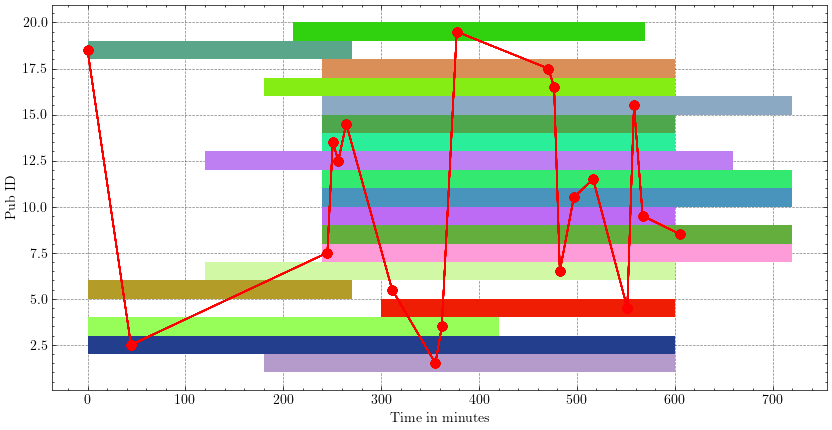

In [18]:
# create a plot where the opening hours and closing hours of the pubs are shown
# in vertical direction plot all the pubs
# in horizontal direction plot the time

# time is in minutes, the opening times are shown as recatangles

fig, ax = plt.subplots(figsize=(10, 5))

bestPath = np.array(bestAnt.timedPath)


x = bestPath[:,1]
y = bestPath[:,0] + 1.5
# convert to integer
# x = x.astype(int)
# y = y.astype(int)

print(bestPath)



for p in Pubs:
    # use different color for each pub
    color = np.random.rand(3,)
    # plot the opening times
    ax.broken_barh([(p.openingTime, p.closingTime - p.openingTime)], (p.pubID, 1), facecolors=color)
    ax.plot(x, y, c='r', marker="o")
    # place a text with the pubName




# label the bars on the y-axis with their name which comes as a string pubName

plt.xlabel('Time in minutes')
plt.ylabel('Pub ID')


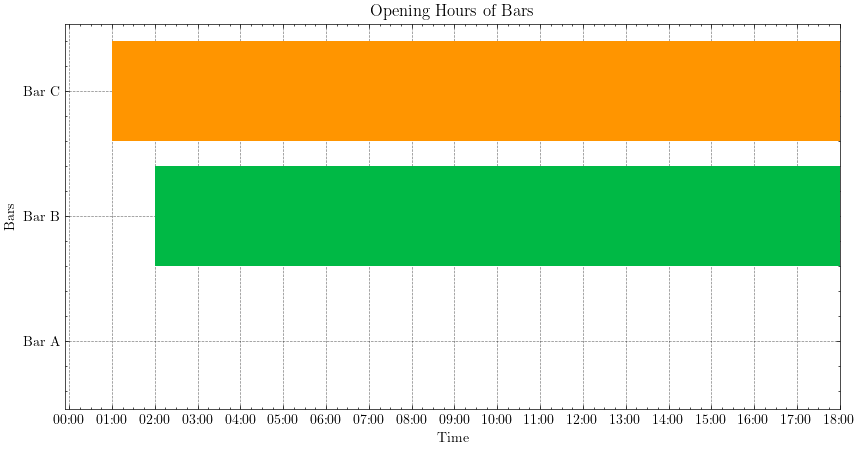

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample data: Bar names, opening times, and closing times
bar_data = [
    {"name": "Bar A", "open": "18:00", "close": "23:00"},
    {"name": "Bar B", "open": "20:00", "close": "02:00"},
    {"name": "Bar C", "open": "19:30", "close": "01:00"},
    # Add more bars as needed
]

# Convert opening and closing times to datetime objects
for bar in bar_data:
    bar["open"] = datetime.strptime(bar["open"], "%H:%M")
    bar["close"] = datetime.strptime(bar["close"], "%H:%M")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot rectangles for each bar's opening hours
for bar in bar_data:
    ax.barh(bar["name"], width=bar["close"] - bar["open"], left=bar["open"])

# Format x-axis as time
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Bars')
plt.title('Opening Hours of Bars')

# Show the plot
plt.show()


[[ 17.           0.        ]
 [  1.          44.37077971]
 [  6.         245.10787845]
 [ 12.         250.57744886]
 [ 11.         256.269263  ]
 [ 13.         264.37605105]
 [  4.         311.23931496]
 [  0.         355.53479466]
 [  2.         362.0381295 ]
 [ 18.         377.25454914]
 [ 16.         470.87661957]
 [ 15.         476.78969505]
 [  5.         482.64818529]
 [  9.         496.89741236]
 [ 10.         516.63323915]
 [  3.         551.57979323]
 [ 14.         558.41263583]
 [  8.         567.32571131]
 [  7.         605.84691883]]


(0.0, 720.0)

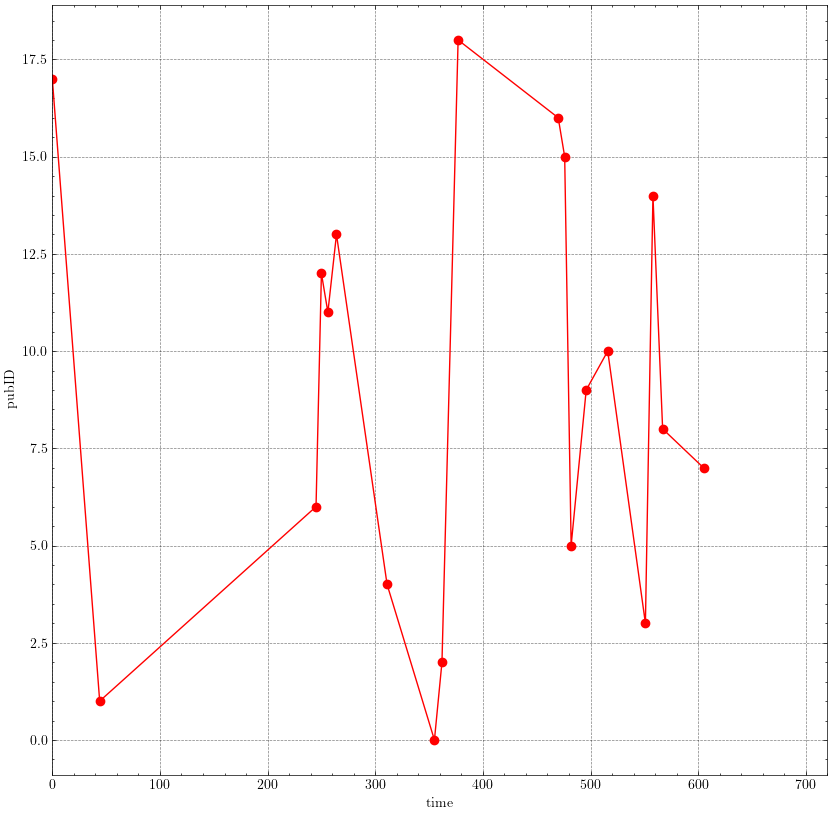

In [14]:
# scatter plot to show the trajectory of the best ant over time, x-> time y-> pubID
fig, ax = plt.subplots(figsize=(10, 10))

bestPath = np.array(bestAnt.timedPath)


x = bestPath[:,1]
y = bestPath[:,0]
# convert to integer
x = x.astype(int)
y = y.astype(int)

print(bestPath)


ax.plot(x, y, c='r', marker="o")
ax.set_xlabel('time')
ax.set_ylabel('pubID')
ax.set_xlim(0, 720)